In [9]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('/home/mingot/lung_cancer_ds_bowl/src')
from utils import plotting


patches_csv = pd.read_csv('/home/shared/output/noduls_patches_v06_dl1_dl2.csv')
print patches_csv.shape
patches_csv = patches_csv[patches_csv["score_dl1"]>0.7]
print patches_csv.shape
print patches_csv.head(n=5)


(5840965, 8)
(66344, 8)
                                    patientid  nslice    x    y  diameter  \
55   dsb_0015ceb851d7251b8f399e39779d1e7d.npz      50  335  381     2.764   
122  dsb_0015ceb851d7251b8f399e39779d1e7d.npz      53  229  404     3.742   
180  dsb_0015ceb851d7251b8f399e39779d1e7d.npz      55  183  403     4.068   
270  dsb_0015ceb851d7251b8f399e39779d1e7d.npz      57  324  451     4.370   
587  dsb_0015ceb851d7251b8f399e39779d1e7d.npz      64  274   90     7.979   

     score_dl1  scored_dl2  label  
55     0.87610     0.00154      0  
122    0.96272     0.08350      0  
180    0.74437     0.00259      0  
270    0.96813     0.00314      0  
587    0.89475     0.03072      0  


(2, 162, 512, 512)


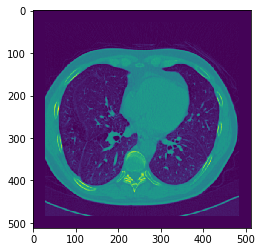

         nslice    x    y  diameter  score_dl1  scored_dl2  label
1708389      38  307  280    13.446    0.97054     0.00658      0
1708530      45  233  368     5.863    0.76617     0.00017      0
1708538      45  302  308     4.918    0.72955     0.00346      0
1708579      47  223  380     9.167    0.98702     0.00200      0
1708703      51  227  373    26.774    0.85101     0.10169      0
1708711      51  264  355     4.514    0.86211     0.00010      0
1708747      52  264  356     5.528    0.83400     0.00024      0
1708814      54  241  383    39.974    0.98759     0.00000      0
1708823      54  267  353     4.222    0.86646     0.00014      0
1708974      58  291  331    15.797    0.80049     0.04600      0
1709118      62  245  381    45.849    0.97366     0.95383      0
1709155      63  230  303     2.985    0.71984     0.01121      0
1709196      64  245  382    40.307    0.97420     0.04392      0
1709200      64  271  404     6.864    0.86716     0.00812      0
1709232   

In [14]:
patientid = 'dsb_%s.npz' % '504e447ad62ea9ebb283873e044b5dd2'
nslice = 101

pat_data = np.load('/mnt/hd2/preprocessed5/%s' % patientid)['arr_0']
print pat_data.shape
plt.imshow(pat_data[0,nslice])
plt.show()

xx = patches_csv[patches_csv['patientid']==patientid]
del xx['patientid']
print xx

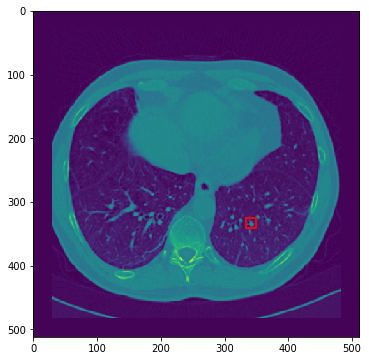

In [16]:
from dl_model_patches import common

nslice = 116
regions = common.extract_rois_from_df("caca", xx[xx['nslice']==nslice])
plotting.plot_bb(pat_data[0,nslice], regions)

